# STATS 131 Final Project
### What to Expect after College

## By: Donjo Lau, Hansol Lee, Quinn Sweetnam

# Context and description of the data –

## 1. Background information on the subject and field of study.

We are using 3 datasets in our analysis we found on kaggle:
(All data was obtained from the Wall Street Journal based on data from Payscale, Inc):
- 'Degrees that Pay Back':
    - which has 50 undergraduate majors with different statistics on salaries (starting medium, mid-career medium, mid-career (10th, 25th, 75th, 90th percentile)
    - unfortunatley, they don't have the statistics major listed here
- 'Salaries by College Type':
    - which has 269 different universities in the United States
    - by School Type: (Engineering, Ivy League, Liberal Arts, Party, State)
    - with different statistics on salaries (starting medium, mid-career medium, mid-career (10th, 25th, 75th, 90th percentile)
    - There are some N/As in some of the salary columns in which we took those out of our analysis. 
  
- 'Salaries by Region':
    - which has 320 universities in the United States
    - By Region: (California, Midwestern, Northeastern, Southern, Western)
    - with different statistics on salaries (starting medium, mid-career medium, mid-career (10th, 25th, 75th, 90th percentile)

## 2. Information about data collection.
- a. Who collected the data
    - All data was obtained from the Wall Street Journal based on data from Payscale, Inc:
    - Links to all three articles:
        - 'Degrees that Pay Back':
            - http://online.wsj.com/public/resources/documents/info-Degrees_that_Pay_you_Back-sort.html
        - 'Salaries by College Type':
            - http://online.wsj.com/public/resources/documents/info-Salaries_for_Colleges_by_Type-sort.html
        - 'Salaries by Region':
        - http://online.wsj.com/public/resources/documents/info-Salaries_for_Colleges_by_Region-sort.html
        
- b. When the data was collected
    - Not specifically stated in the dataset, but this data was collected in reference to this article: 
        - https://www.wsj.com/articles/SB121746658635199271
    - In this article, it states that the data was collected around 2008.
    
- c. How the data was collected
    - In the yearlong effort, PayScale Inc., an online provider of global compensation data, surveyed 1.2 million bachelor's degree graduates with a minimum of 10 years of work experience (with a median of 15.5 years). The subjects hailed from more than 300 U.S. schools ranging from state institutions to the Ivy League, and their incomes show that the subject you major in can have little to do with your long-term earning power. PayScale excluded survey respondents who reported having advanced degrees, including M.B.A.s, M.D.s and J.D.s.
    
- d. Any implications this may have on analysis
    - The data we are using was collected 10 years ago. A lot could have changed since then to the salary amount people receive by major. In addition, there are now more colleges and majors, so we may not see this trend happening right now. 
    - They also excluded survey respondents who reported having advanced degrees, including M.B.A.s, M.D.s and J.D.s. This means our sample reflects people that have only had a bachelor's degree and did not pursue an advanced degree in the future. This is pretty unusual as many students nowadays are doing that. Thus, our sample cannot reflect entirely our 'study population' of how much a student makes after getting their bachelor's degree as some will go on to get and advanced degree. 
    
    - In addition, there are missing values in some of the columns. We left those observations or rows out of our analysis. 
    

# Exploratory Analysis of the Data

In [1]:
#Packages used in this project
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Reading and Cleaning the data:

In [2]:
#Read in datasets:
deg_pay_back = pd.read_csv("degrees-that-pay-back.csv")
sal_col_type = pd.read_csv("salaries-by-college-type.csv")
sal_region = pd.read_csv("salaries-by-region.csv")


#### Convert all salaries into appropriate form. (need to remove dollar sign and commas

In [3]:
# if you want to operate on multiple columns, put them in a list like so:
salary_variables = ['Starting Median Salary', 'Mid-Career Median Salary', 'Mid-Career 10th Percentile Salary', 'Mid-Career 25th Percentile Salary',
       'Mid-Career 75th Percentile Salary', 'Mid-Career 90th Percentile Salary']

# pass them to df.replace(), specifying each char and it's replacement:
deg_pay_back[salary_variables] = deg_pay_back[salary_variables].replace({'\$': '', ',': ''}, regex=True)
#convert all objects into floats
deg_pay_back[salary_variables] = deg_pay_back[salary_variables].astype(str).astype(float)

salary_variables_1 = ["Starting Median Salary","Mid-Career Median Salary", "Mid-Career 10th Percentile Salary", 
                      "Mid-Career 25th Percentile Salary","Mid-Career 75th Percentile Salary", "Mid-Career 90th Percentile Salary"
                     ]
# pass them to df.replace(), specifying each char and it's replacement:
sal_col_type[salary_variables_1] = sal_col_type[salary_variables_1].replace({'\$': '', ',': ''}, regex=True)
#convert all objects into integers
#sal_col_type[salary_variables_1] = sal_col_type[salary_variables_1].astype(str).astype(float).astype(int)
sal_col_type[salary_variables_1] = sal_col_type[salary_variables_1].astype(str).astype(float)

salary_variables_2 = ["Starting Median Salary", "Mid-Career Median Salary", "Mid-Career 10th Percentile Salary", "Mid-Career 25th Percentile Salary", "Mid-Career 75th Percentile Salary", "Mid-Career 90th Percentile Salary"]
# pass them to df.replace(), specifying each char and it's replacement:
sal_region[salary_variables_2] = sal_region[salary_variables_2].replace({'\$': '', ',': ''}, regex=True)
#convert all objects into integers
#sal_col_type[salary_variables_1] = sal_col_type[salary_variables_1].astype(str).astype(float).astype(int)
sal_region[salary_variables_2] = sal_region[salary_variables_2].astype(str).astype(float)

## 1. Summary statistics and the distributional shape of variables in the data

### Let's take a look at the Degrees that Pay Back dataset first

- Analysis: Looking at all majors coming out of school the starting median salary is around   \$41,000, with most people making between \$37,050 and \$49,875. (25th and 75th percentile)

- By their mid-career,the median salary is around \$72,000, with most people making between  \$60,825 and \$88,750 (25th and 75th percentile)

- If you are an above-average performer (75th percentile), your mid-career median salary will be around \$99,400, with most people making between \$83,275 and \$118,750 (25th and 75th percentile)

- If you are an elite performer (90th percentile), your mid-career median salary will be around \$145,500, with most people making between \$124,250 and \$161,750 (25th and 75th percentile)

-> These numbers will vary depending on major. This is just the general trend of how people's salaries change over their career if they only had a bachelor's degree.

In [4]:
deg_pay_back.describe()

,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
count,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,44310.000000,74786.00000,69.274000,43408.000000,55988.000000,102138.000000,142766.000000
std,9360.866217,16088.40386,17.909908,12000.779567,13936.951911,20636.789914,27851.249267
min,34000.000000,52000.00000,23.400000,26700.000000,36500.000000,70500.000000,96400.000000
25%,37050.000000,60825.00000,59.125000,34825.000000,44975.000000,83275.000000,124250.000000
50%,40850.000000,72000.00000,67.800000,39400.000000,52450.000000,99400.000000,145500.000000
75%,49875.000000,88750.00000,82.425000,49850.000000,63700.000000,118750.000000,161750.000000
max,74300.000000,107000.00000,103.500000,71900.000000,87300.000000,145000.000000,210000.000000


In [5]:
deg_pay_back.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,46000.0,77100.0,67.6,42200.0,56100.0,108000.0,152000.0
1,Aerospace Engineering,57700.0,101000.0,75.0,64300.0,82100.0,127000.0,161000.0
2,Agriculture,42600.0,71900.0,68.8,36300.0,52100.0,96300.0,150000.0
3,Anthropology,36800.0,61500.0,67.1,33800.0,45500.0,89300.0,138000.0
4,Architecture,41600.0,76800.0,84.6,50600.0,62200.0,97000.0,136000.0


In [6]:
deg_pay_back.sort_values(by = 'Starting Median Salary', ascending = False, inplace=True)
sort_a = deg_pay_back.reset_index()

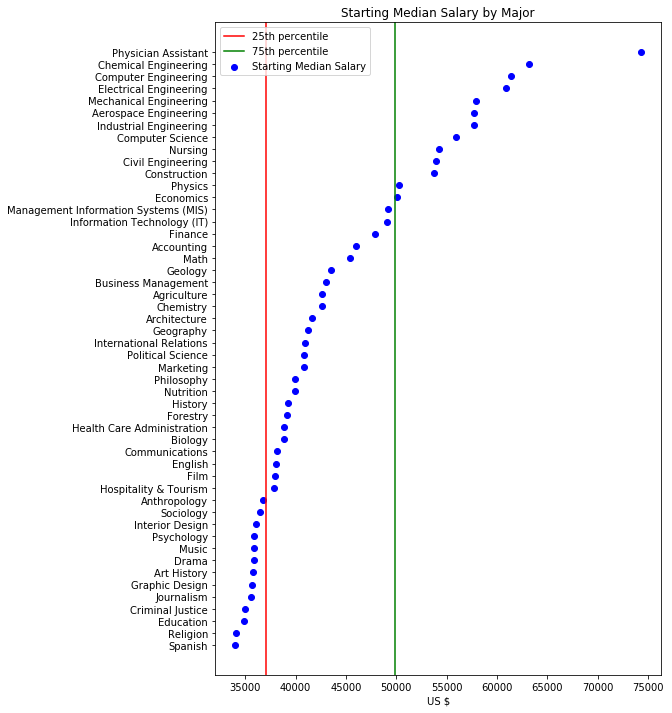

In [7]:
fig = plt.figure(figsize=(8,12))

x = sort_a['Starting Median Salary']
y = len(sort_a.index) - sort_a.index
labels = sort_a["Undergraduate Major"]

plt.scatter(x, y, color='b', label = 'Starting Median Salary')
plt.yticks(y, labels)

#Plot percentiles:
plt.axvline(x=(np.percentile(sort_a['Starting Median Salary'], 25)), color = 'red', label = '25th percentile')

plt.axvline(x=(np.percentile(sort_a['Starting Median Salary'], 75)), color = 'green', label = '75th percentile')


plt.xlabel('US $')
plt.ylabel('')
plt.title('Starting Median Salary by Major')
plt.legend(loc=2) #move the legend
plt.show()

- Looking at the majors that were at or above the 75th percentile line of (\$49875)
    - It is mostly engineering majors, nursing, economics, and physics

In [8]:
deg_pay_back.head(n=13)

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
43,Physician Assistant,74300.0,91700.0,23.4,66400.0,75200.0,108000.0,124000.0
8,Chemical Engineering,63200.0,107000.0,69.3,71900.0,87300.0,143000.0,194000.0
12,Computer Engineering,61400.0,105000.0,71.0,66100.0,84100.0,135000.0,162000.0
19,Electrical Engineering,60900.0,103000.0,69.1,69300.0,83800.0,130000.0,168000.0
38,Mechanical Engineering,57900.0,93600.0,61.7,63700.0,76200.0,120000.0,163000.0
1,Aerospace Engineering,57700.0,101000.0,75.0,64300.0,82100.0,127000.0,161000.0
30,Industrial Engineering,57700.0,94700.0,64.1,57100.0,72300.0,132000.0,173000.0
13,Computer Science,55900.0,95500.0,70.8,56000.0,74900.0,122000.0,154000.0
40,Nursing,54200.0,67000.0,23.6,47600.0,56400.0,80900.0,98300.0
10,Civil Engineering,53900.0,90500.0,67.9,63400.0,75100.0,115000.0,148000.0


- Looking at the majors that were at or above the 75th percentile line of (\$37050)
    - It is mostly liberal arts majors: spanish, journalism, education, music, etc.

In [9]:
deg_pay_back.tail(n=13)

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
3,Anthropology,36800.0,61500.0,67.1,33800.0,45500.0,89300.0,138000.0
48,Sociology,36500.0,58200.0,59.5,30700.0,40400.0,81200.0,118000.0
32,Interior Design,36100.0,53200.0,47.4,35700.0,42600.0,72500.0,107000.0
46,Psychology,35900.0,60400.0,68.2,31600.0,42100.0,87500.0,127000.0
39,Music,35900.0,55000.0,53.2,26700.0,40200.0,88000.0,134000.0
16,Drama,35900.0,56900.0,58.5,36700.0,41300.0,79100.0,153000.0
5,Art History,35800.0,64900.0,81.3,28800.0,42200.0,87400.0,125000.0
26,Graphic Design,35700.0,59800.0,67.5,36000.0,45500.0,80800.0,112000.0
34,Journalism,35600.0,66700.0,87.4,38400.0,48300.0,97700.0,145000.0
15,Criminal Justice,35000.0,56300.0,60.9,32200.0,41600.0,80700.0,107000.0


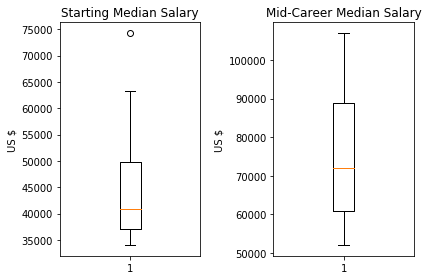

In [10]:
plt.subplot(1, 2, 1)
plt.boxplot(sort_a['Starting Median Salary'])
plt.ylabel('US $')
plt.title("Starting Median Salary")

plt.subplot(1, 2, 2)
plt.boxplot(sort_a['Mid-Career Median Salary'])
plt.title("Mid-Career Median Salary")
plt.ylabel('US $')

plt.tight_layout()
plt.show()

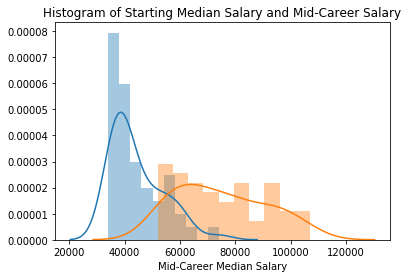

In [11]:
sns.distplot(sort_a['Starting Median Salary'], bins = 10)
sns.distplot(sort_a['Mid-Career Median Salary'], bins = 10)
plt.title("Histogram of Starting Median Salary and Mid-Career Salary")
plt.show()

- Looking at the boxplots, there is only one outlier for starting median salary which is the salary of a Physician Assistant. 
- Looking at the histogram of the starting median salary, it is slightly skewed right. 
- Looking at the Mid-career Median salary it, is less skewed right

### Look at the change of Starting Median Salary to Mid-Career Median Salary

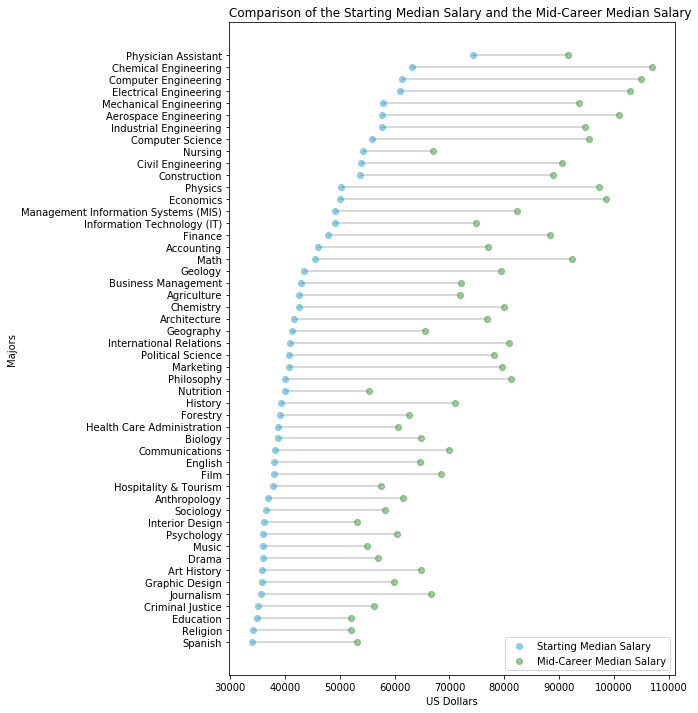

In [12]:
fig = plt.figure(figsize=(8,12))
ordered_df = deg_pay_back.sort_values(by='Starting Median Salary')
my_range=range(1,len(deg_pay_back.index)+1)

plt.hlines(y=my_range, xmin=ordered_df['Starting Median Salary'], xmax=ordered_df['Mid-Career Median Salary'], color='grey', alpha=0.4)
plt.scatter(ordered_df['Starting Median Salary'], my_range, color='skyblue', alpha=1, label='Starting Median Salary')
plt.scatter(ordered_df['Mid-Career Median Salary'], my_range, color='green', alpha=0.4 , label='Mid-Career Median Salary')
plt.legend(loc = "lower right")

# Add title and axis names
plt.yticks(my_range, ordered_df['Undergraduate Major'])
plt.title("Comparison of the Starting Median Salary and the Mid-Career Median Salary", loc='left')
plt.xlabel('US Dollars')
plt.ylabel('Majors')
plt.show()

- The plot above shows the change in median salary fron start to mid-career. It is sorted from highest to lowest starting median salary.
- We see that the majors with the lowest starting salaries still tend to have the lowest mid-career median salary. However, we see that all these majors see a pretty significant increase in salary. 

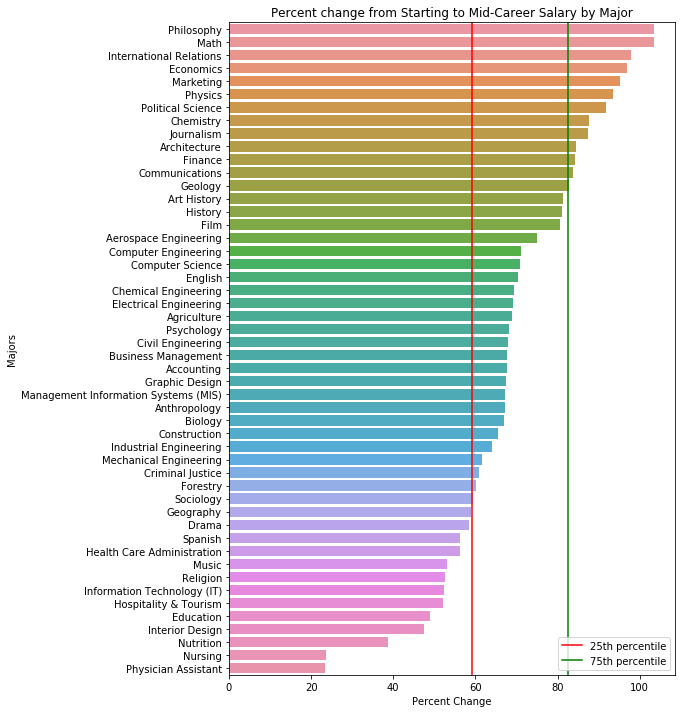

In [13]:
fig = plt.figure(figsize=(8,12))
deg_pay_back.sort_values(by = 'Percent change from Starting to Mid-Career Salary', ascending = False, inplace=True)
sort_b = deg_pay_back.reset_index()
sns.barplot(x=sort_b['Percent change from Starting to Mid-Career Salary'], y = sort_b["Undergraduate Major"], data=sort_b)

#Plot percentiles:
plt.axvline(x=(np.percentile(sort_b['Percent change from Starting to Mid-Career Salary'], 25)), color = 'red', label = '25th percentile')

plt.axvline(x=(np.percentile(sort_b['Percent change from Starting to Mid-Career Salary'], 75)), color = 'green', label = '75th percentile')


plt.xlabel('Percent Change')
plt.ylabel('Majors')
plt.title('Percent change from Starting to Mid-Career Salary by Major')
plt.legend(loc=4) #move the legend
plt.show()

- From this graph, we see the greatest percent change in median salary is Philosophy and Math.
- You don't see much of a percent change in salary in nursing and being a Physician Assistant.

### Look at the Trend for all majors given their percentiles over their career:

In [14]:
deg_pay_back.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
42,Philosophy,39900.0,81200.0,103.5,35500.0,52800.0,127000.0,168000.0
37,Math,45400.0,92400.0,103.5,45200.0,64200.0,128000.0,183000.0
33,International Relations,40900.0,80900.0,97.8,38200.0,56000.0,111000.0,157000.0
17,Economics,50100.0,98600.0,96.8,50600.0,70600.0,145000.0,210000.0
36,Marketing,40800.0,79600.0,95.1,42100.0,55600.0,119000.0,175000.0


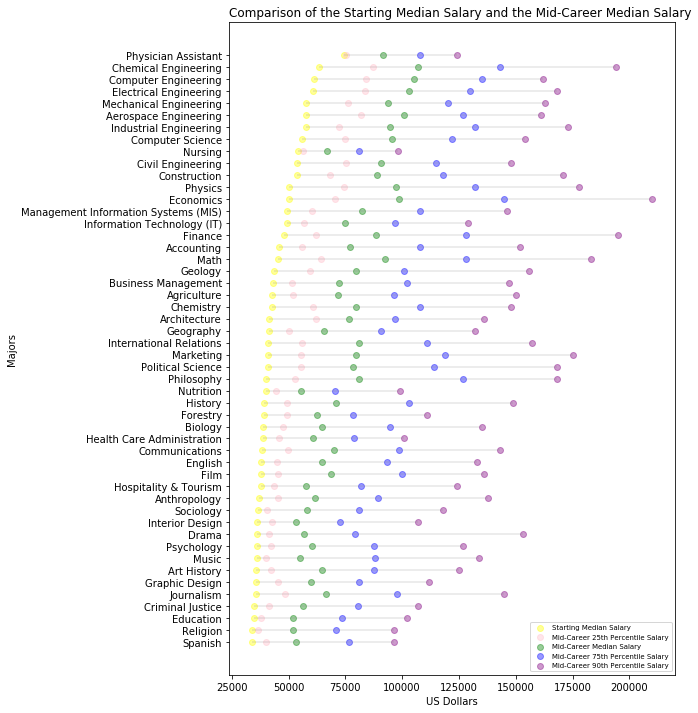

In [15]:
fig = plt.figure(figsize=(8,12))
ordered_df = deg_pay_back.sort_values(by='Starting Median Salary')
my_range=range(1,len(deg_pay_back.index)+1)

#Plot horizontal line
plt.hlines(y=my_range, xmin=ordered_df['Starting Median Salary'], xmax=ordered_df['Mid-Career 90th Percentile Salary'], color='grey', alpha=0.2)

#Starting Median Salary
plt.scatter(ordered_df['Starting Median Salary'], my_range, color='yellow', alpha=0.4, label='Starting Median Salary')
#Mid-Career(10th)
#plt.scatter(ordered_df['Mid-Career 10th Percentile Salary'], my_range, color='orange', alpha=0.4 , label='Mid-Career 10th Percentile Salary')
#Mid-Career(25th)
plt.scatter(ordered_df['Mid-Career 25th Percentile Salary'], my_range, color='pink', alpha=0.4 , label='Mid-Career 25th Percentile Salary')
#Mid-Career(50th)
plt.scatter(ordered_df['Mid-Career Median Salary'], my_range, color='green', alpha=0.4 , label='Mid-Career Median Salary')
#Mid-Career(75th)
plt.scatter(ordered_df['Mid-Career 75th Percentile Salary'], my_range, color='blue', alpha=0.4 , label='Mid-Career 75th Percentile Salary')
#Mid-Career(90th)
plt.scatter(ordered_df['Mid-Career 90th Percentile Salary'], my_range, color='purple', alpha=0.4 , label='Mid-Career 90th Percentile Salary')



plt.legend(loc = "lower right", fontsize = 'x-small')

# Add title and axis names
plt.yticks(my_range, ordered_df['Undergraduate Major'])
plt.title("Comparison of the Starting Median Salary and the Mid-Career Median Salary", loc='left')
plt.xlabel('US Dollars')
plt.ylabel('Majors')
plt.show()

- In the above plot, I show the projected growth of each major for different percentiles (excluding the 10% mid-career percentile salary)

- It is sorted from highest to lowest of starting median salary. 

- This plot shows if you are one of the most successful in your particular major, this is how much you can earn. 

- We see here that even if the starting median salary is low, you can still make more than other majors if you are very successful though this will take time. 
    - Economics has the highest 90th percentile salary even though the starting median salary is not that high. 
    - We also see that if you are really good at what you do. You can make a comfortable salary of \$100,000 or more. 


#### Let's now look at another dataset of 'Salaries by College Type':
- which has 269 different universities in the United States by School Type: (Engineering, Ivy League, Liberal Arts, Party, State) with different statistics on salaries (starting medium, mid-career medium, mid-career (10th, 25th, 75th, 90th percentile)

- There are some N/As the salary columns(10th and 90th), but the 25th and 75th have no missing data. 

- Check for any duplicate School Names: We want to see if schools are classified as two types:

In [16]:
egg = sal_col_type.groupby('School Name').filter(lambda x: x['School Name'].count()>1)
duplicates = egg.groupby('School Name')['School Type'].apply(lambda x: '-'.join(x)).reset_index()
print(duplicates.shape)
duplicates


(20, 2)


,School Name,School Type
0,Arizona State University (ASU),Party-State
1,Florida State University (FSU),Party-State
2,"Indiana University (IU), Bloomington",Party-State
3,Louisiana State University (LSU),Party-State
4,Ohio University,Party-State
5,Pennsylvania State University (PSU),Party-State
6,Randolph-Macon College,Party-Liberal Arts
7,State University of New York (SUNY) at Albany,Party-State
8,"University of Alabama, Tuscaloosa",Party-State
9,"University of California, Santa Barbara (UCSB)",Party-State


- We see here that there are 20 universities with Multiple School Types
- We may want to treat these particular universities as their own type? (as mixed)
    - 95% of them are Party, State so we'll create a new school Type called ['Party_State'] 
    - We'll leave Randolph-Macon College classified as just a Liberal Arts school since I did some research and it is mostly known for that. 
    

In [17]:
egg = sal_col_type.groupby('School Name').filter(lambda x: x['School Name'].count()>1)
duplicates = egg.groupby('School Name')['School Type'].apply(lambda x: '-'.join(x)).reset_index()
print(duplicates.shape)
duplicates.head()

#Code that could be useful for later:
#dup_names = duplicates["School Name"]
#dog = []
#for i in dup_names:
    #dog.append(sal_col_type.loc[sal_col_type["School Name"] == i])

(20, 2)


,School Name,School Type
0,Arizona State University (ASU),Party-State
1,Florida State University (FSU),Party-State
2,"Indiana University (IU), Bloomington",Party-State
3,Louisiana State University (LSU),Party-State
4,Ohio University,Party-State


In [18]:
#Merge datasets of duplicates with new 'School Type' on to original dataset
#using left join to keep all school names of sal_col_type
power = pd.merge(sal_col_type, duplicates,on ='School Name', how = 'left')

#Move all the School Types that are not multiple types
#replace NaN with number 10
power["School Type_y"] = power["School Type_y"].replace(np.nan, 10)

#replace all 10's with the school type that is not multiple types
power["School Type_y"][power["School Type_y"] == 10] = power["School Type_x"]
#drop the column that doesn't have our new group
power = power.drop(columns='School Type_x')

#change 'Randolph-Macon College' to just a Liberal Arts college:
power["School Type_y"][power["School Type_y"] == "Party-Liberal Arts"] = "Liberal Arts"
# to check: print(power_a.loc[power_a["School Name"] == 'Randolph-Macon College'])


#drop duplicates 
clean_school_type= power.drop_duplicates()
print(clean_school_type.shape)

g = clean_school_type.groupby("School Type_y")
print(g.groups.keys())


(249, 8)
dict_keys(['Engineering', 'Ivy League', 'Liberal Arts', 'Party-State', 'State'])


C:\Users\hjohnlee\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\hjohnlee\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


- We see that the shape went down by 20 from 269 to 249. This is because we took colleges that were listed as both Party or State. (20 rows were Party and 20 rows were State, total of 40 rows) and we put them into one category: Party-State (20 unique schools)

- 


In [19]:
clean_school_type.shape
# which has 249 universities in the United States

(249, 8)

In [20]:
sal_region.shape
#which has 320 universities in the United States

(320, 8)

#### Q: Let's try and build a model that is able to predict your starting median salary based on what type of school you attend, region it is located, and major that you choose.

##### Our metric is going to be one that looks at the difference in starting median salary for each major, school, and region.

##### First we are going to merge the 'Salaries by College Type' and 'Salaries by Region' on School  Name

In [21]:
#rename columns in sal_region to drop later
sal_region.columns = ['School Name', 'Region', 'R_Starting Median Salary',
       'R_Mid-Career Median Salary', 'R_Mid-Career 10th Percentile Salary',
       'R_Mid-Career 25th Percentile Salary',
       'R_Mid-Career 75th Percentile Salary',
       'R_Mid-Career 90th Percentile Salary']
#Merge datasets:
egg = pd.merge(sal_region, clean_school_type, on = 'School Name')

#Drop repeating columns
combined_reg_type = egg.drop(columns=['R_Starting Median Salary',
       'R_Mid-Career Median Salary', 'R_Mid-Career 10th Percentile Salary',
       'R_Mid-Career 25th Percentile Salary',
       'R_Mid-Career 75th Percentile Salary',
       'R_Mid-Career 90th Percentile Salary'])
combined_reg_type.shape

(248, 9)

- We have now a dataset with 248 universities with school name and region and the salary statistics. 

In [22]:
combined_reg_type.groupby('Region')['Starting Median Salary'].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
California,26.0,50142.307692,8410.430337,38000.0,45550.0,48050.0,52200.0,75500.0
Midwestern,60.0,43620.000000,4561.028727,35300.0,41100.0,42700.0,45325.0,57100.0
Northeastern,67.0,49440.298507,7894.360467,37500.0,43550.0,47300.0,54000.0,72200.0
Southern,57.0,44166.666667,4473.267156,34800.0,41400.0,43100.0,46500.0,58300.0
Western,38.0,44065.789474,3942.168173,37300.0,41925.0,44400.0,46050.0,58100.0


- Here we see that the medain starting median salary is \$4,000 higher for California and Northeastern schools than the other regions.

- This is could be due to the very good schools being located in California(UC system) and the Northeast(Ivy League)


In [23]:
combined_reg_type.groupby('School Type_y')['Starting Median Salary'].describe()

,count,mean,std,min,25%,50%,75%,max
School Type_y,,,,,,,,
Engineering,18.0,59411.111111,7913.271718,46200.0,54075.0,59450.0,62100.0,75500.0
Ivy League,8.0,60475.000000,3218.584427,56200.0,58825.0,59850.0,61525.0,66500.0
Liberal Arts,47.0,45746.808511,4368.854743,38500.0,42250.0,45500.0,48600.0,54500.0
Party-State,19.0,45878.947368,3711.031445,41300.0,42650.0,44700.0,48550.0,52900.0
State,156.0,43912.820513,4293.862356,34800.0,41175.0,43350.0,46125.0,59900.0


- Here we see that the median 'starting median salary' about \$10,000 more for Engineering schools and Ivy League schools compared to the other School Types. 

### Graph of Salary and Geography

In [24]:
import geopandas as gpd

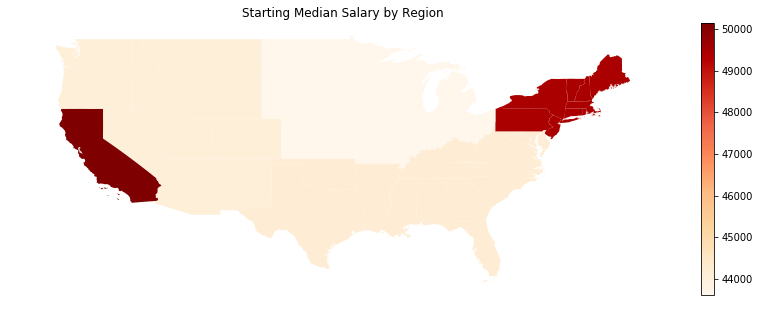

In [31]:
# Store median salaries of each region into data frame
region_salary = pd.DataFrame(combined_reg_type.groupby('Region')['Starting Median Salary'].mean())

# Read in shapefile for mapping of US states
states = gpd.GeoDataFrame.from_file('C:/Users/hjohnlee/Downloads/Collage/17-18/Spring 2018/Stats 131/final project/state shapefile/cb_2017_us_state_500k.shp')

# Get rid of Guam, Mariana Islands and Virgin Islands
states = states[states.STATEFP.astype(int) < 60]
# Get rid of Hawaii and Alaska
states = states[~states.NAME.isin(['Hawaii', 'Alaska', 'District of Columbia'])]

# Lists of all US regions
California = ['California']
Northeast = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont',
            'New Jersey', 'New York', 'Pennsylvania']
Midwest = ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin',
             'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota']
South = ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'West Virginia',
           'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas']
West = ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming',
          'Alaska', 'Hawaii', 'Oregon', 'Washington']
salary = []

# Assign salary value to each state, depending on which region it belongs to
for st in states['NAME']:
    if st in California:
        salary.append(region_salary.loc['California', 'Starting Median Salary'])
    elif st in Northeast:
        salary.append(region_salary.loc['Northeastern', 'Starting Median Salary'])
    elif st in Midwest:
        salary.append(region_salary.loc['Midwestern', 'Starting Median Salary'])
    elif st in South:
        salary.append(region_salary.loc['Southern', 'Starting Median Salary'])
    elif st in West:
        salary.append(region_salary.loc['Western', 'Starting Median Salary'])
        
states['SALARY'] = salary

# Plot the continental US
us_map = states.plot(column = 'SALARY', cmap = 'OrRd', legend = True, figsize=(15, 5))
us_map.set_title('Starting Median Salary by Region')
us_map.axis('off')
plt.show()


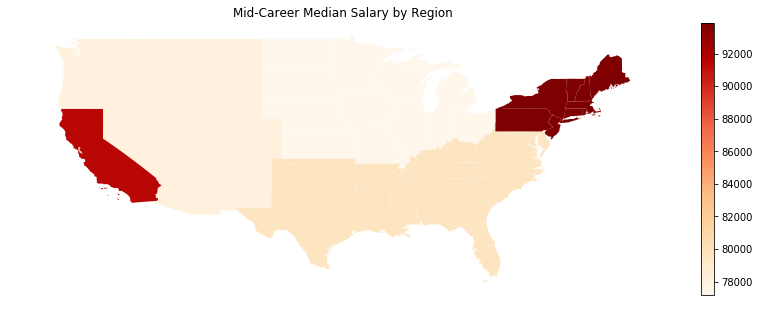

In [32]:
median_salary = pd.DataFrame(combined_reg_type.groupby('Region')['Mid-Career Median Salary'].mean())

med_salary = []

# Assign salary value to each state, depending on which region it belongs to
for st in states['NAME']:
    if st in California:
        med_salary.append(median_salary.loc['California', 'Mid-Career Median Salary'])
    elif st in Northeast:
        med_salary.append(median_salary.loc['Northeastern', 'Mid-Career Median Salary'])
    elif st in Midwest:
        med_salary.append(median_salary.loc['Midwestern', 'Mid-Career Median Salary'])
    elif st in South:
        med_salary.append(median_salary.loc['Southern', 'Mid-Career Median Salary'])
    elif st in West:
        med_salary.append(median_salary.loc['Western', 'Mid-Career Median Salary'])
        
states['MED_SALARY'] = med_salary

# Plot the continental US
us_map = states.plot(column = 'MED_SALARY', cmap = 'OrRd', legend = True, figsize=(15, 5))
us_map.set_title('Mid-Career Median Salary by Region')
us_map.axis('off')
plt.show()